### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load train dataset

In [37]:
AbsenteeismAtWork = pd.read_csv('data/train_data.csv', index_col=0)
AbsenteeismAtWork['Work load Average/day '] = [x.replace(',', '.') for x in AbsenteeismAtWork['Work load Average/day ']]
AbsenteeismAtWork['Work load Average/day '] = AbsenteeismAtWork['Work load Average/day '].astype(float)

### Peak data set

In [38]:
AbsenteeismAtWork.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
ID,,,,,,,,,,,,,,,,,,,,
1,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
2,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,1
4,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
5,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1


### Get summary of DataFrame


In [43]:
AbsenteeismAtWork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 20 columns):
Reason for absence                 500 non-null int64
Month of absence                   500 non-null int64
Day of the week                    500 non-null int64
Seasons                            500 non-null int64
Transportation expense             500 non-null int64
Distance from Residence to Work    500 non-null int64
Service time                       500 non-null int64
Age                                500 non-null int64
Work load Average/day              500 non-null float64
Hit target                         500 non-null int64
Disciplinary failure               500 non-null int64
Education                          500 non-null int64
Son                                500 non-null int64
Social drinker                     500 non-null int64
Social smoker                      500 non-null int64
Pet                                500 non-null int64
Weight                       

### Get descriptive statistics
!!! A new DataFrame should be created, without binary columns !!! 

In [14]:
AbsenteeismAtWork.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.288000,6.614000,3.88000,2.450000,223.640000,29.978000,12.650000,36.660000,94.168000,0.064000,1.204000,1.086000,0.620000,0.076000,0.628000,79.698000,172.098000,26.870000,0.790000
std,8.543245,3.343555,1.43587,1.165425,67.323155,15.068498,4.036345,6.137731,3.912338,0.244998,0.561261,1.178721,0.485873,0.265264,1.071406,12.605101,6.234913,4.151092,0.407716
min,0.000000,1.000000,2.00000,1.000000,118.000000,5.000000,3.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.750000,3.00000,1.000000,179.000000,16.000000,10.000000,33.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,1.000000
50%,23.000000,7.000000,4.00000,2.000000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,1.000000
75%,26.000000,9.000000,5.00000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,28.000000,12.000000,6.00000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,3.000000,4.000000,1.000000,1.000000,5.000000,108.000000,196.000000,38.000000,1.000000


# EDA

Let's create some simple plots to check out the data!

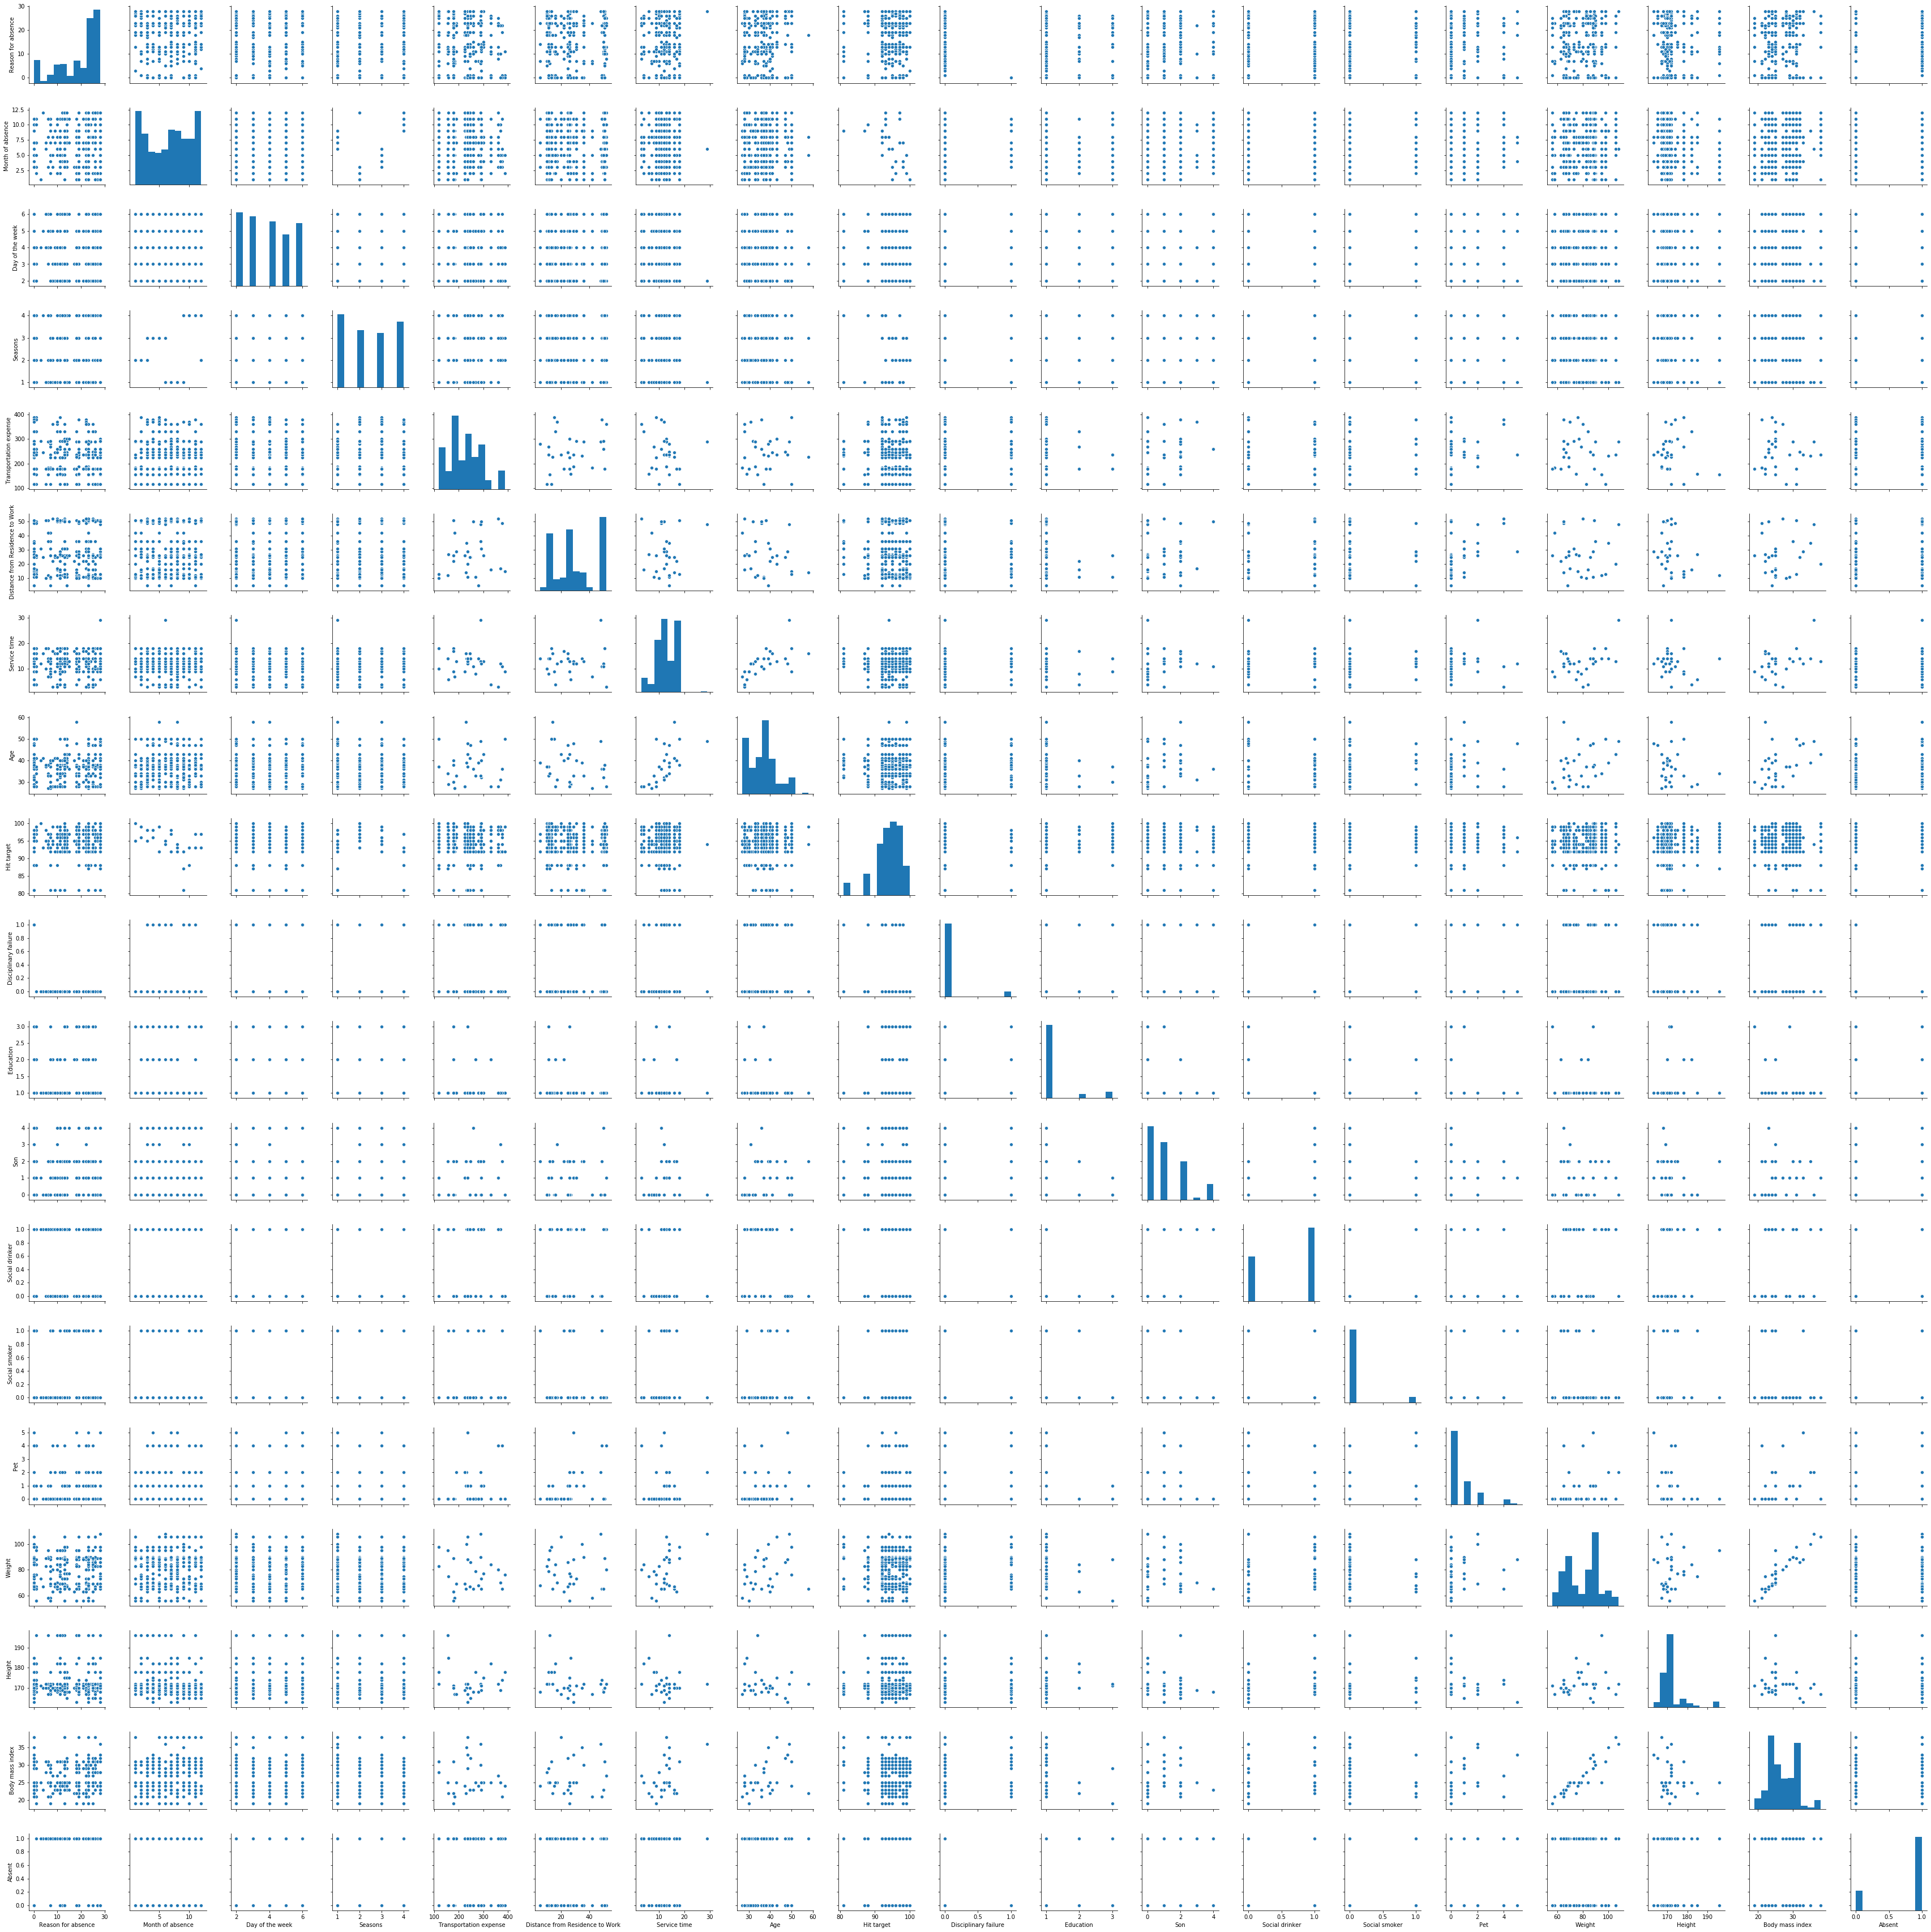

In [17]:
sns.pairplot(AbsenteeismAtWork)

In [ ]:
sns.heatmap(AbsenteeismAtWork.corr())

# Training models

### Model types that will be trained

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Train Test Split

Target var is 'Absent'

In [40]:
y_train = AbsenteeismAtWork['Absent']
X_train = AbsenteeismAtWork.drop('Absent', axis=1)

X_test = pd.read_csv('data/test_data.csv', index_col=0)
y_test = pd.read_csv('data/sample_submission.csv', index_col=0)

### Creating and Training the Models

In [20]:
linearmodel = LinearRegression()
logmodel = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=1)
svc = SVC()

In [41]:
linearmodel.fit(X_train,y_train)
logmodel.fit(X_train,y_train)
knn.fit(X_train,y_train)
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Models Prediction and Evaluation



In [44]:
from sklearn.metrics import classification_report


In [48]:
predLinear = linearmodel.predict(X_test)
predLog = logmodel.predict(X_test)
predKNN = knn.predict(X_test)
predSVC = svc.predict(X_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [49]:
#print(classification_report(y_test,predLinear))
#print(classification_report(y_test,predLog))
print(classification_report(y_test,predKNN))
print(classification_report(y_test,predSVC))

              precision    recall  f1-score   support

           0       0.16      0.07      0.10        44
           1       0.81      0.92      0.86       196

    accuracy                           0.76       240
   macro avg       0.49      0.49      0.48       240
weighted avg       0.69      0.76      0.72       240

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.82      1.00      0.90       196

    accuracy                           0.82       240
   macro avg       0.41      0.50      0.45       240
weighted avg       0.67      0.82      0.73       240



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
